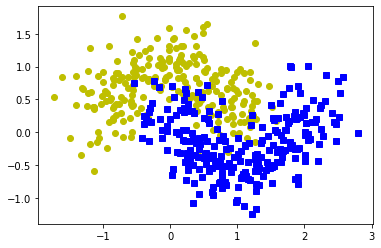

In [1]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt

X, Y = make_moons(n_samples=500, noise=0.30, random_state=42)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=42)
plt.plot(X[:, 0][Y==0], X[:, 1][Y==0], "yo", label="0")
plt.plot(X[:, 0][Y==1], X[:, 1][Y==1], "bs", label="1")

In [4]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score


log_clf = LogisticRegression(solver="lbfgs", random_state=42)
rnd_clf = RandomForestClassifier(n_estimators=100, random_state=42)
svm_clf = SVC(gamma="scale", probability=True, random_state=42)

voting_clf = VotingClassifier(
    estimators=[('lr', log_clf), ('rf', rnd_clf), ('svc', svm_clf)],
    voting='soft')

for clf in (log_clf, rnd_clf, svm_clf, voting_clf):
    clf.fit(X_train, Y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(Y_test, y_pred))

LogisticRegression 0.864
RandomForestClassifier 0.896
SVC 0.896
VotingClassifier 0.92


### Bagging

In [6]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

bag_clf = BaggingClassifier(
    DecisionTreeClassifier(), n_estimators=500,
    max_samples=100, bootstrap=True, random_state=42)
bag_clf.fit(X_train, Y_train)
y_pred = bag_clf.predict(X_test)
print(accuracy_score(Y_test, y_pred))

0.904


### Out of Bag

In [8]:
bag_clf = BaggingClassifier(
    DecisionTreeClassifier(), n_estimators=500,
    bootstrap=True, oob_score=True, random_state=40)
bag_clf.fit(X_train, Y_train)
y_pred = bag_clf.predict(X_test)
accuracy_score(Y_test, y_pred)

0.912

## Boosting

In [26]:
from sklearn.ensemble import AdaBoostClassifier

ada_clf = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=3), n_estimators=200,
    algorithm="SAMME.R", learning_rate=0.1, random_state=42)
ada_clf.fit(X_train, Y_train)
y_pred = ada_clf.predict(X_test)
accuracy_score(Y_test, y_pred)

0.872

In [23]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier(max_depth=3, n_estimators=200, learning_rate=0.01, random_state=42)
gbc.fit(X_train, Y_train)
gbc.fit(X_train, Y_train)
y_pred = gbc.predict(X_test)
accuracy_score(Y_test, y_pred)

0.912